In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

In [4]:
cont_features = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
data_train.drop(cont_features, axis=1, inplace=True)
data_train.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [9]:
data_train.groupby(data_train['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [13]:
data_train['Cabin_indicator'] = np.where(data_train['Cabin'].isnull(), 0, 1)
data_train.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_indicator
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


<Figure size 432x288 with 0 Axes>

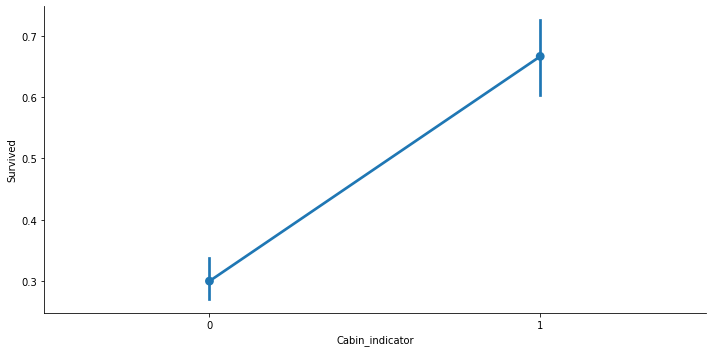

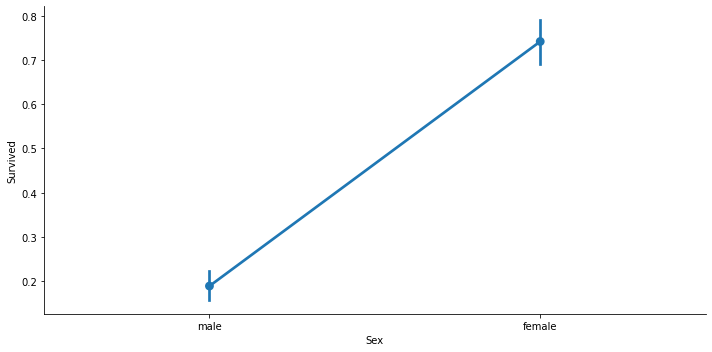

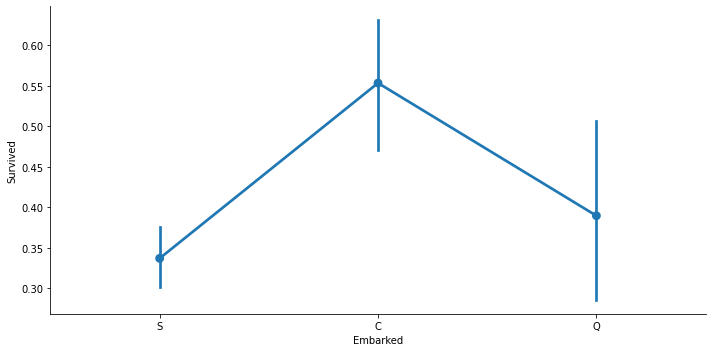

In [15]:
for i, col in enumerate(['Cabin_indicator', 'Sex', 'Embarked']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=data_train, kind='point', aspect=2,)

In [17]:
data_train.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [18]:
data_train.pivot_table('Survived', index='Cabin_indicator', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_indicator,,,
0,99,73,515
1,69,4,129


In [22]:
data_train.drop(['Ticket'], axis=1, inplace=True)
data_train.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,male,NaN,S,0
1,1,female,C85,C,1
2,1,female,NaN,S,0
3,1,female,C123,S,1
4,0,male,NaN,S,0


In [23]:
binary_gender = {'male': 0, 'female': 1}
data_train['Sex'] = data_train['Sex'].map(binary_gender)

In [25]:
data_train.head()

,Survived,Sex,Cabin,Embarked,Cabin_indicator
0,0,0,NaN,S,0
1,1,1,C85,C,1
2,1,1,NaN,S,0
3,1,1,C123,S,1
4,0,0,NaN,S,0


In [27]:
data_train.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
data_train.head()

,Survived,Sex,Cabin_indicator
0,0,0,0
1,1,1,1
2,1,1,0
3,1,1,1
4,0,0,0
